# Histogram Equilization and Histogram Specification
In this assignment we will learn about histograms, some of their applications and techinques used to play with them 

### Utils
To initialise the assignment, run these 3 cells only once

In [ ]:
#taken from this StackOverflow answer: https://stackoverflow.com/a/39225039
import requests

def download_file_from_google_drive(id, destination):
    URL = "https://docs.google.com/uc?export=download"

    session = requests.Session()

    response = session.get(URL, params = { 'id' : id }, stream = True)
    token = get_confirm_token(response)

    if token:
        params = { 'id' : id, 'confirm' : token }
        response = session.get(URL, params = params, stream = True)

    save_response_content(response, destination)    

def get_confirm_token(response):
    for key, value in response.cookies.items():
        if key.startswith('download_warning'):
            return value

    return None

def save_response_content(response, destination):
    CHUNK_SIZE = 32768

    with open(destination, "wb") as f:
        for chunk in response.iter_content(CHUNK_SIZE):
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)

file_id = '1gCiAZnEiEzOsrfU97Z7lk0pjDhiBnfF0'
destination = '/content/dataset.zip'
download_file_from_google_drive(file_id, destination)

In [ ]:
!unzip -q dataset.zip
!rm -rf dataset.zip

In [ ]:
import cv2
import matplotlib.pyplot as plt

def load_image(number):
  img = cv2.imread(f"/content/original_images/img{number}.bmp")
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  return gray

def show_image(image):
  plt.figure(figsize=(12,5))
  plt.imshow(image,cmap='gray')
  plt.axis('off')
  plt.show()

def calculate_hist(gray):
  fig,ax = plt.subplots(1,2,figsize=(15,5))
  ax[0].imshow(gray,cmap="gray")
  ax[0].axis('off')
  ax[0].set_title("Image")

  ax[1].hist(gray.ravel(), bins=32, range=(0.0, 256.0), ec='k') #calculating histogram
  ax[1].set_title("Histogram")
  ax[1].set_xlabel("range")
  plt.show()

def compare_matched_hist(src,dst,matched_src):
  images = [src,dst,matched_src]
  headings = ["Source","Destination","Matched Source"]
  n,m = len(images),2
  fig,ax = plt.subplots(n,m,figsize=(15,10))

  for i, (heading,img) in enumerate(zip(headings,images)):
    ax[i,0].imshow(img,cmap="gray")
    ax[i,0].axis('off')
    ax[i,0].set_title(heading)

    ax[i,1].hist(img.ravel(), bins=32, range=(0.0, 256.0), ec='k') #calculating histogram
  plt.show()

### Question 1: What are Histograms?
[1 mark]

A histogram is a graph used to show frequency distributions. A frequency distribution shows how often each different value 
 in a set of data occurs. It is similar to a Bar Chart, but a histogram groups numbers into ranges. A histogram is a bar 
 graph-like representation of data that buckets a range of outcomes into columns along the x-axis. The y-axis represents 
 the number count or percentage of occurrences in the data for each column and can be used to visualize data distributions.
 Histograms are a great way to show results of continuous data. A Frequency Histogram is a special graph that uses vertical 
 columns to show frequencies (how many times each score occurs).
 

### Questions 2: Applications of Histograms?
[1]


1. In Digital image processing an histogram tool shows you the distribution of the contrast / brightness of the pixels.
2. A quick look at a histogram can immediately reveal what the most common outcome of a process with varying outcomes is.
3. A histogram can make it quite obvious when your results are deviating from the expected values.
4. Displaying Data in a Histogram and Constructing a Frequency Distribution Table.
5. One can easily increase or decrease the brightness of an image through its histogram.  


## Histogram Equalizing


### Question 3: What is Histogram Equalizaiton 
[1]

Histogram Equalization is a computer image processing technique used to improve contrast in images. It accomplishes this by effectively spreading out the most frequent intensity values, i.e. stretching out the intensity range of the image. This allows for areas of lower local contrast to gain a higher contrast. The method is useful in images with backgrounds and foregrounds that are both bright or both dark. In particular, the method can lead to better views of bone structure in x-ray images, and to better detail in photographs that are either over or under-exposed.

### Question 4 
below are some inbuilt examples of histogram equalizing from OpenCV, your task is to reproduce them without using any inbuilts, you can use the function `calculate_hist` to show insights, also **explain your results comparing** with inbuilt. [1+1]

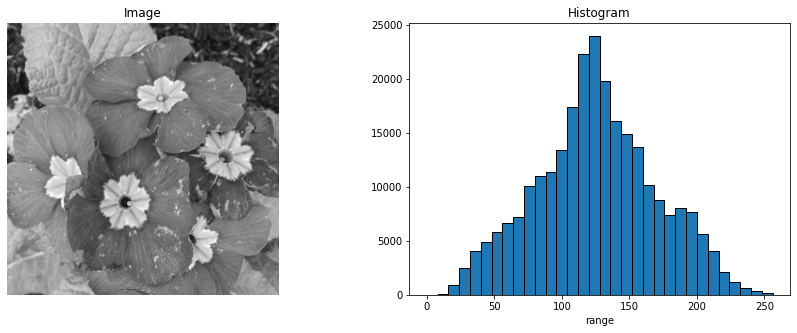

In [ ]:
gray = load_image(15)
calculate_hist(gray)

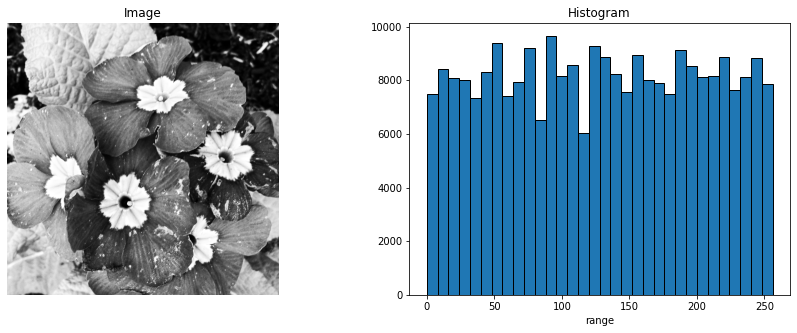

In [ ]:
equalized_gray = cv2.equalizeHist(gray)
calculate_hist(equalized_gray)

<ipython-input-73-b521c6475ed4>:22: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "my_equalizing_histograms" failed type inference due to: Invalid use of type(CPUDispatcher(<function cdf_ at 0x7f6eca850680>)) with parameters (array(uint8, 2d, C))

During: resolving callee type: type(CPUDispatcher(<function cdf_ at 0x7f6eca850680>))
During: typing of call at <ipython-input-73-b521c6475ed4> (30)


File "<ipython-input-73-b521c6475ed4>", line 30:
def my_equalizing_histograms(src):
    <source elided>
  # [TODO] 
  r_cdf=cdf_(src)
  ^

  @jit
<ipython-input-73-b521c6475ed4>:22: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "my_equalizing_histograms" failed type inference due to: cannot determine Numba type of <class 'numba.core.dispatcher.LiftedLoop'>

File "<ipython-input-73-b521c6475ed4>", line 33:
def my_equalizing_histograms(src):
    <source elided>
  hist_eq=np.zeros(256)
  

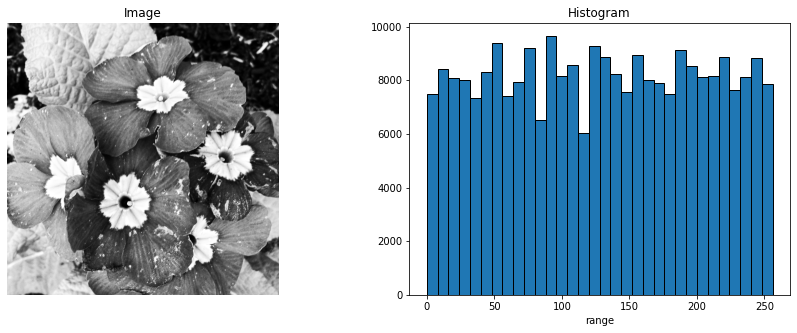

In [ ]:
import numpy as np
from numba import jit

@jit
def cdf_(src):
  r,c=src.shape
  n=256
  freq=np.zeros(n)
  pdf=np.zeros(n)
  cdf=np.zeros(n)
  for i in range(r):
    for j in range(c):
      freq[src[i][j]]+=1
  total_sum=sum(freq)
  for i in range(n):
    pdf[i]=freq[i]/total_sum
  cdf[0]=pdf[0]
  for i in range(1,n):
    cdf[i]=cdf[i-1]+pdf[i]
  return cdf

@jit
def my_equalizing_histograms(src):
  """
  :param src: input image
  :rtype: image 
  :return dest: histogram equalized src image
  """
  # [TODO] 
  r_cdf=cdf_(src)
  r_cdf=r_cdf*255
  hist_eq=np.zeros(256)
  for i in range(256):
    hist_eq[i]=round(r_cdf[i])
  dest=src.copy()
  r,c=src.shape
  tmp=0
  for i in range(r):
    for j in range(c):
      tmp=dest[i][j]
      dest[i][j]=hist_eq[tmp]
  return dest

calculate_hist(my_equalizing_histograms(gray))


We can observe that histogram is stretched as expected. It means pixel values are more evenly distribted. It can be also observed by looking at the change of intensity of image. thus our implementation is fulfilling its task.

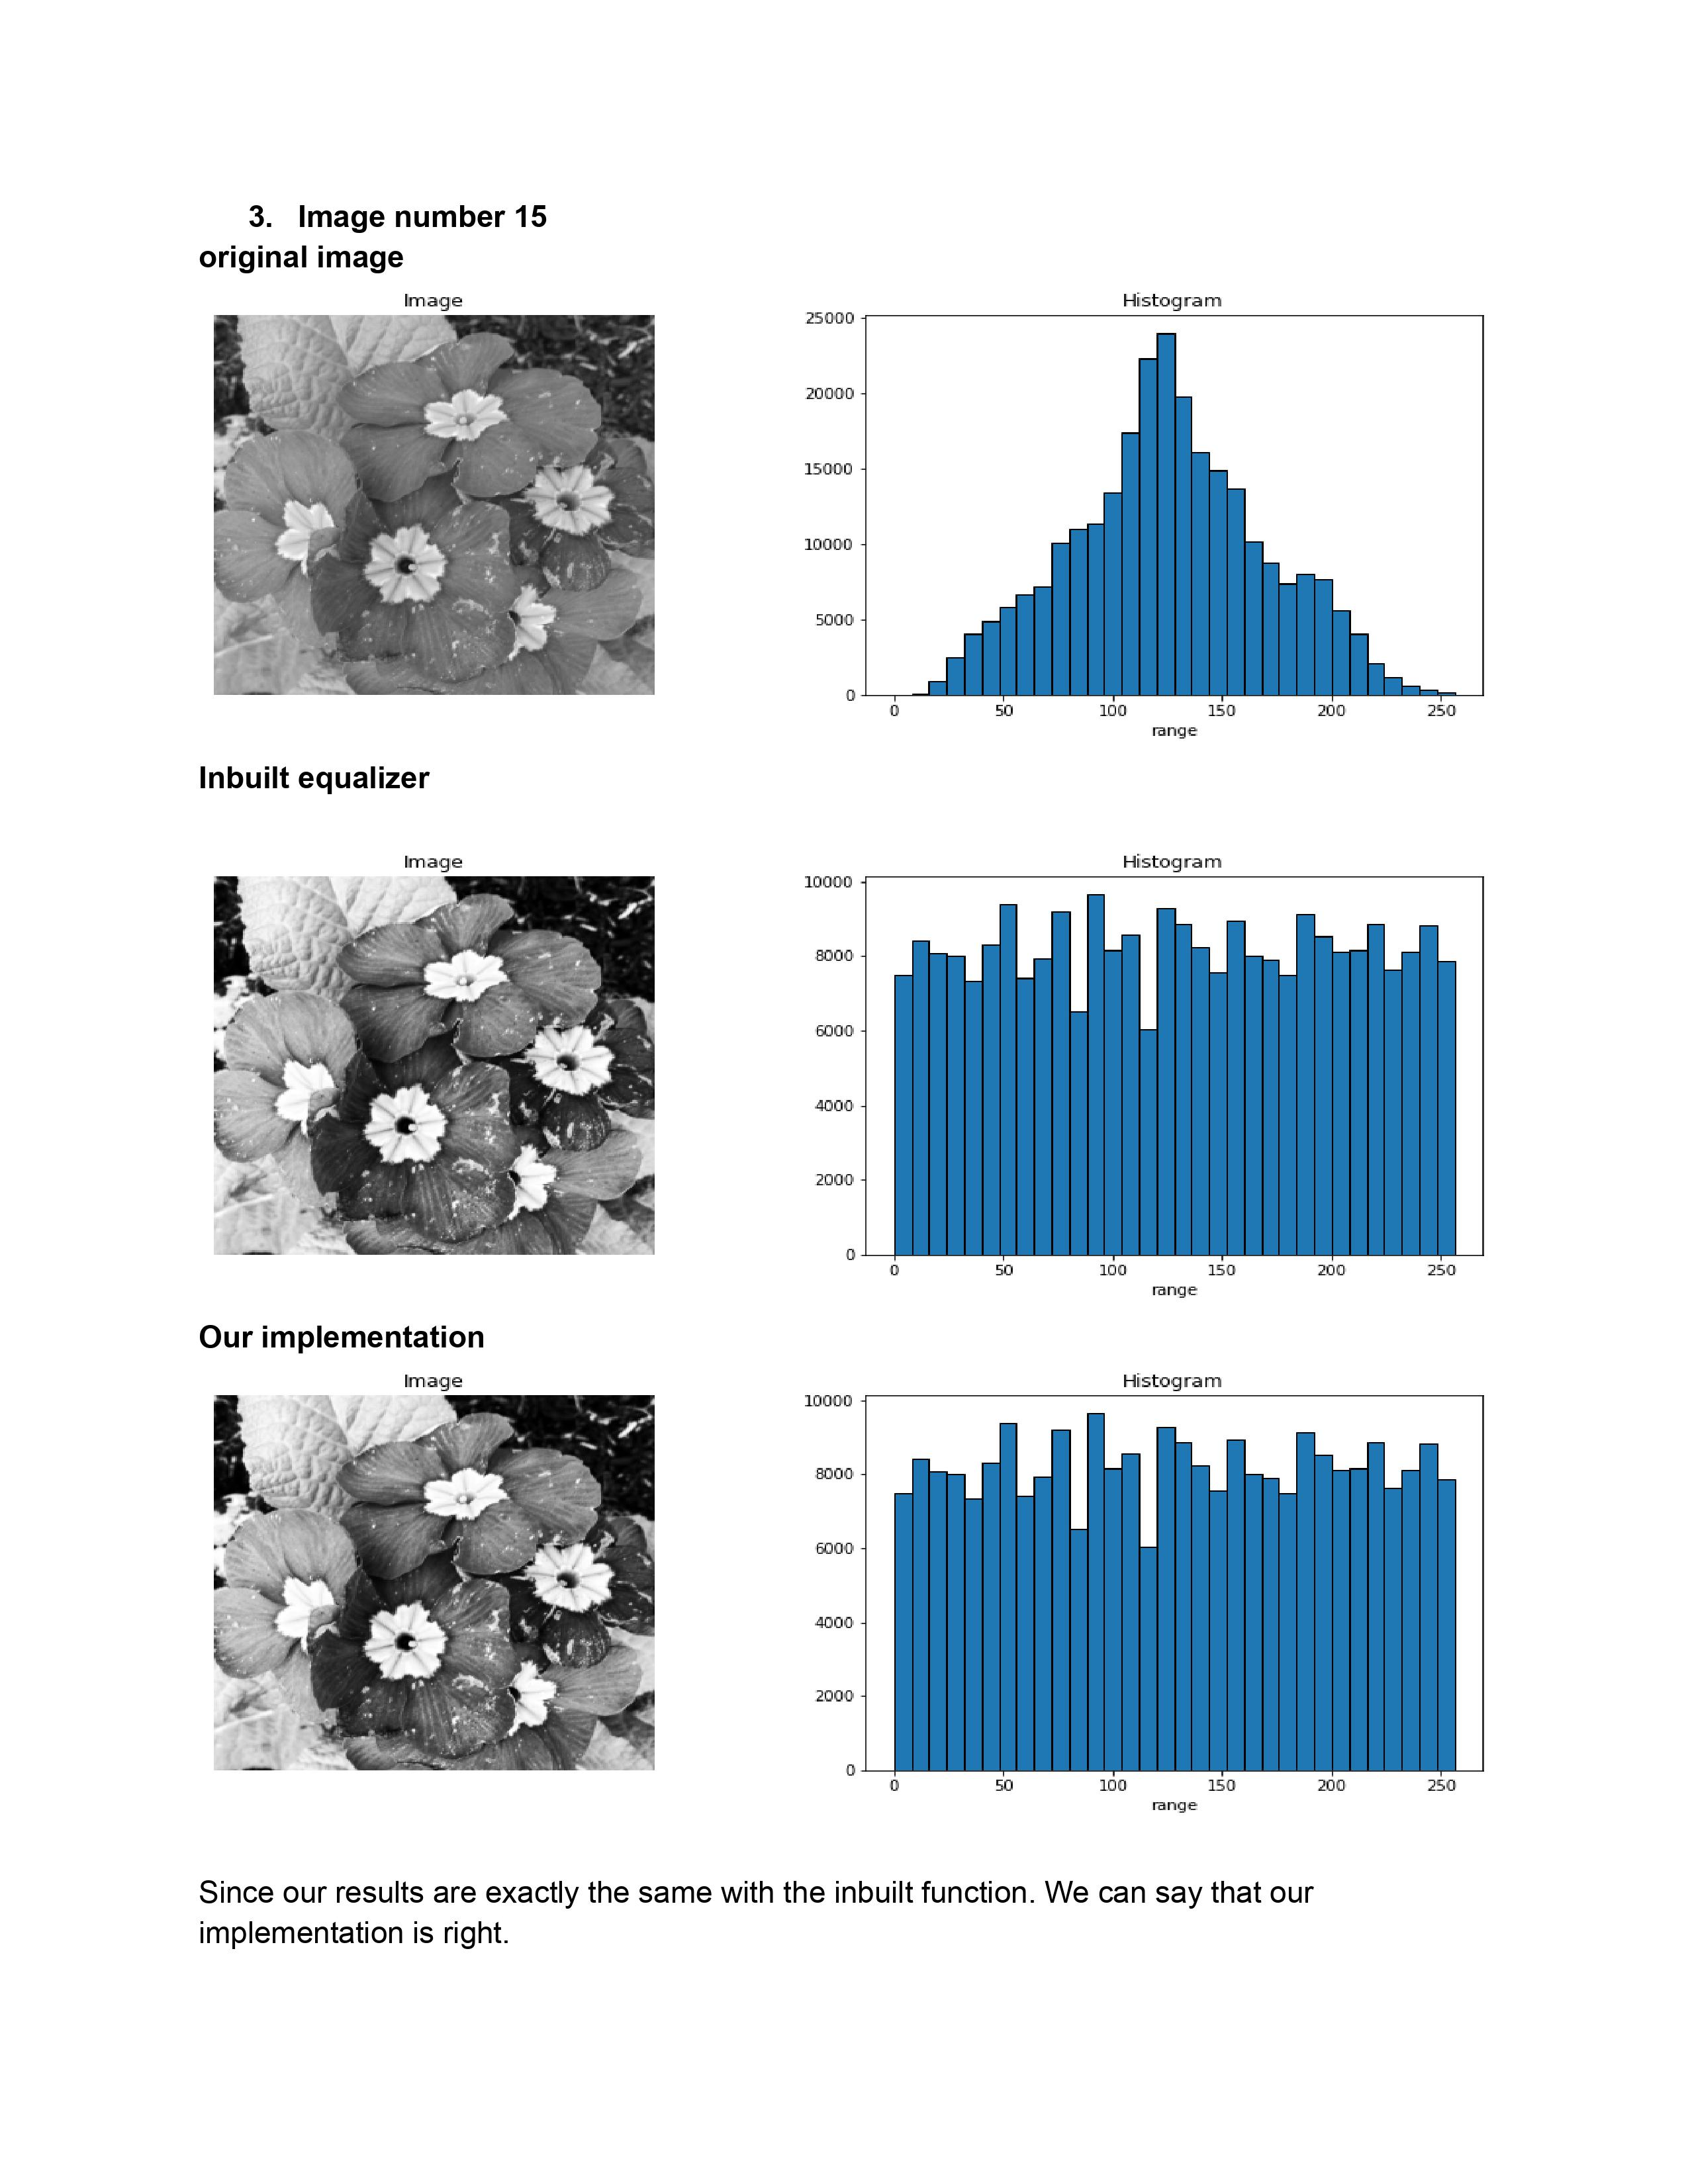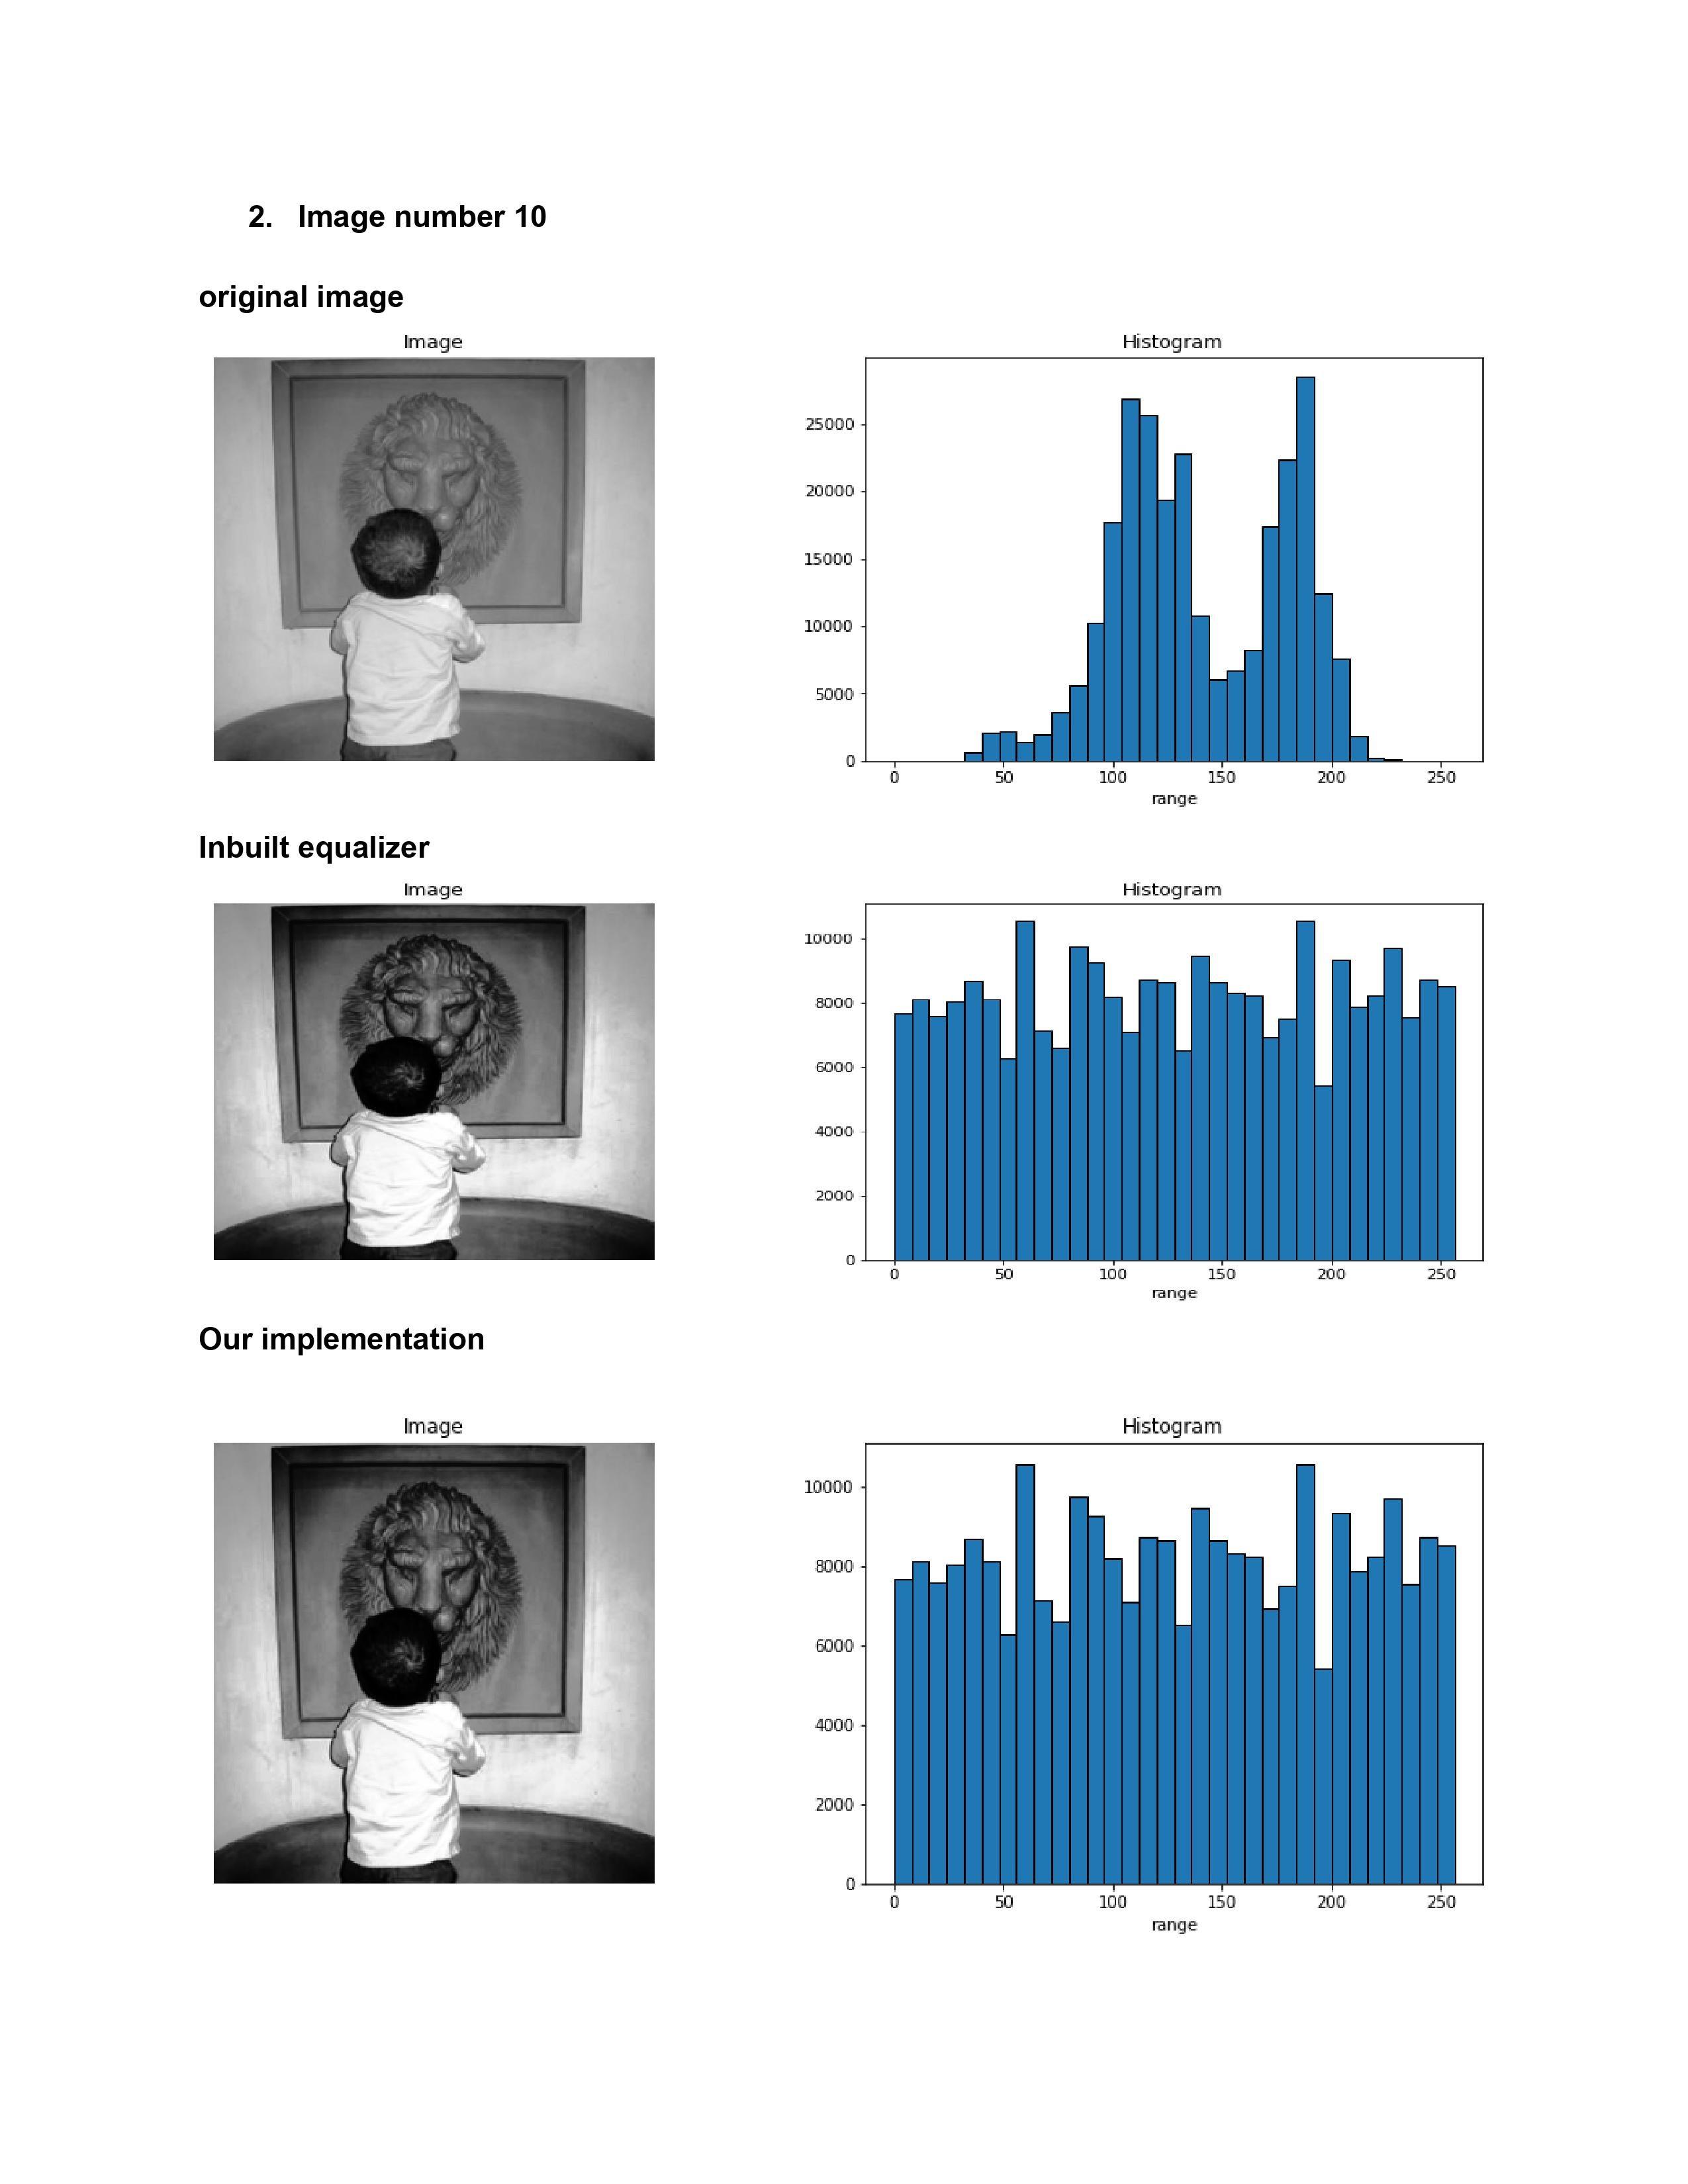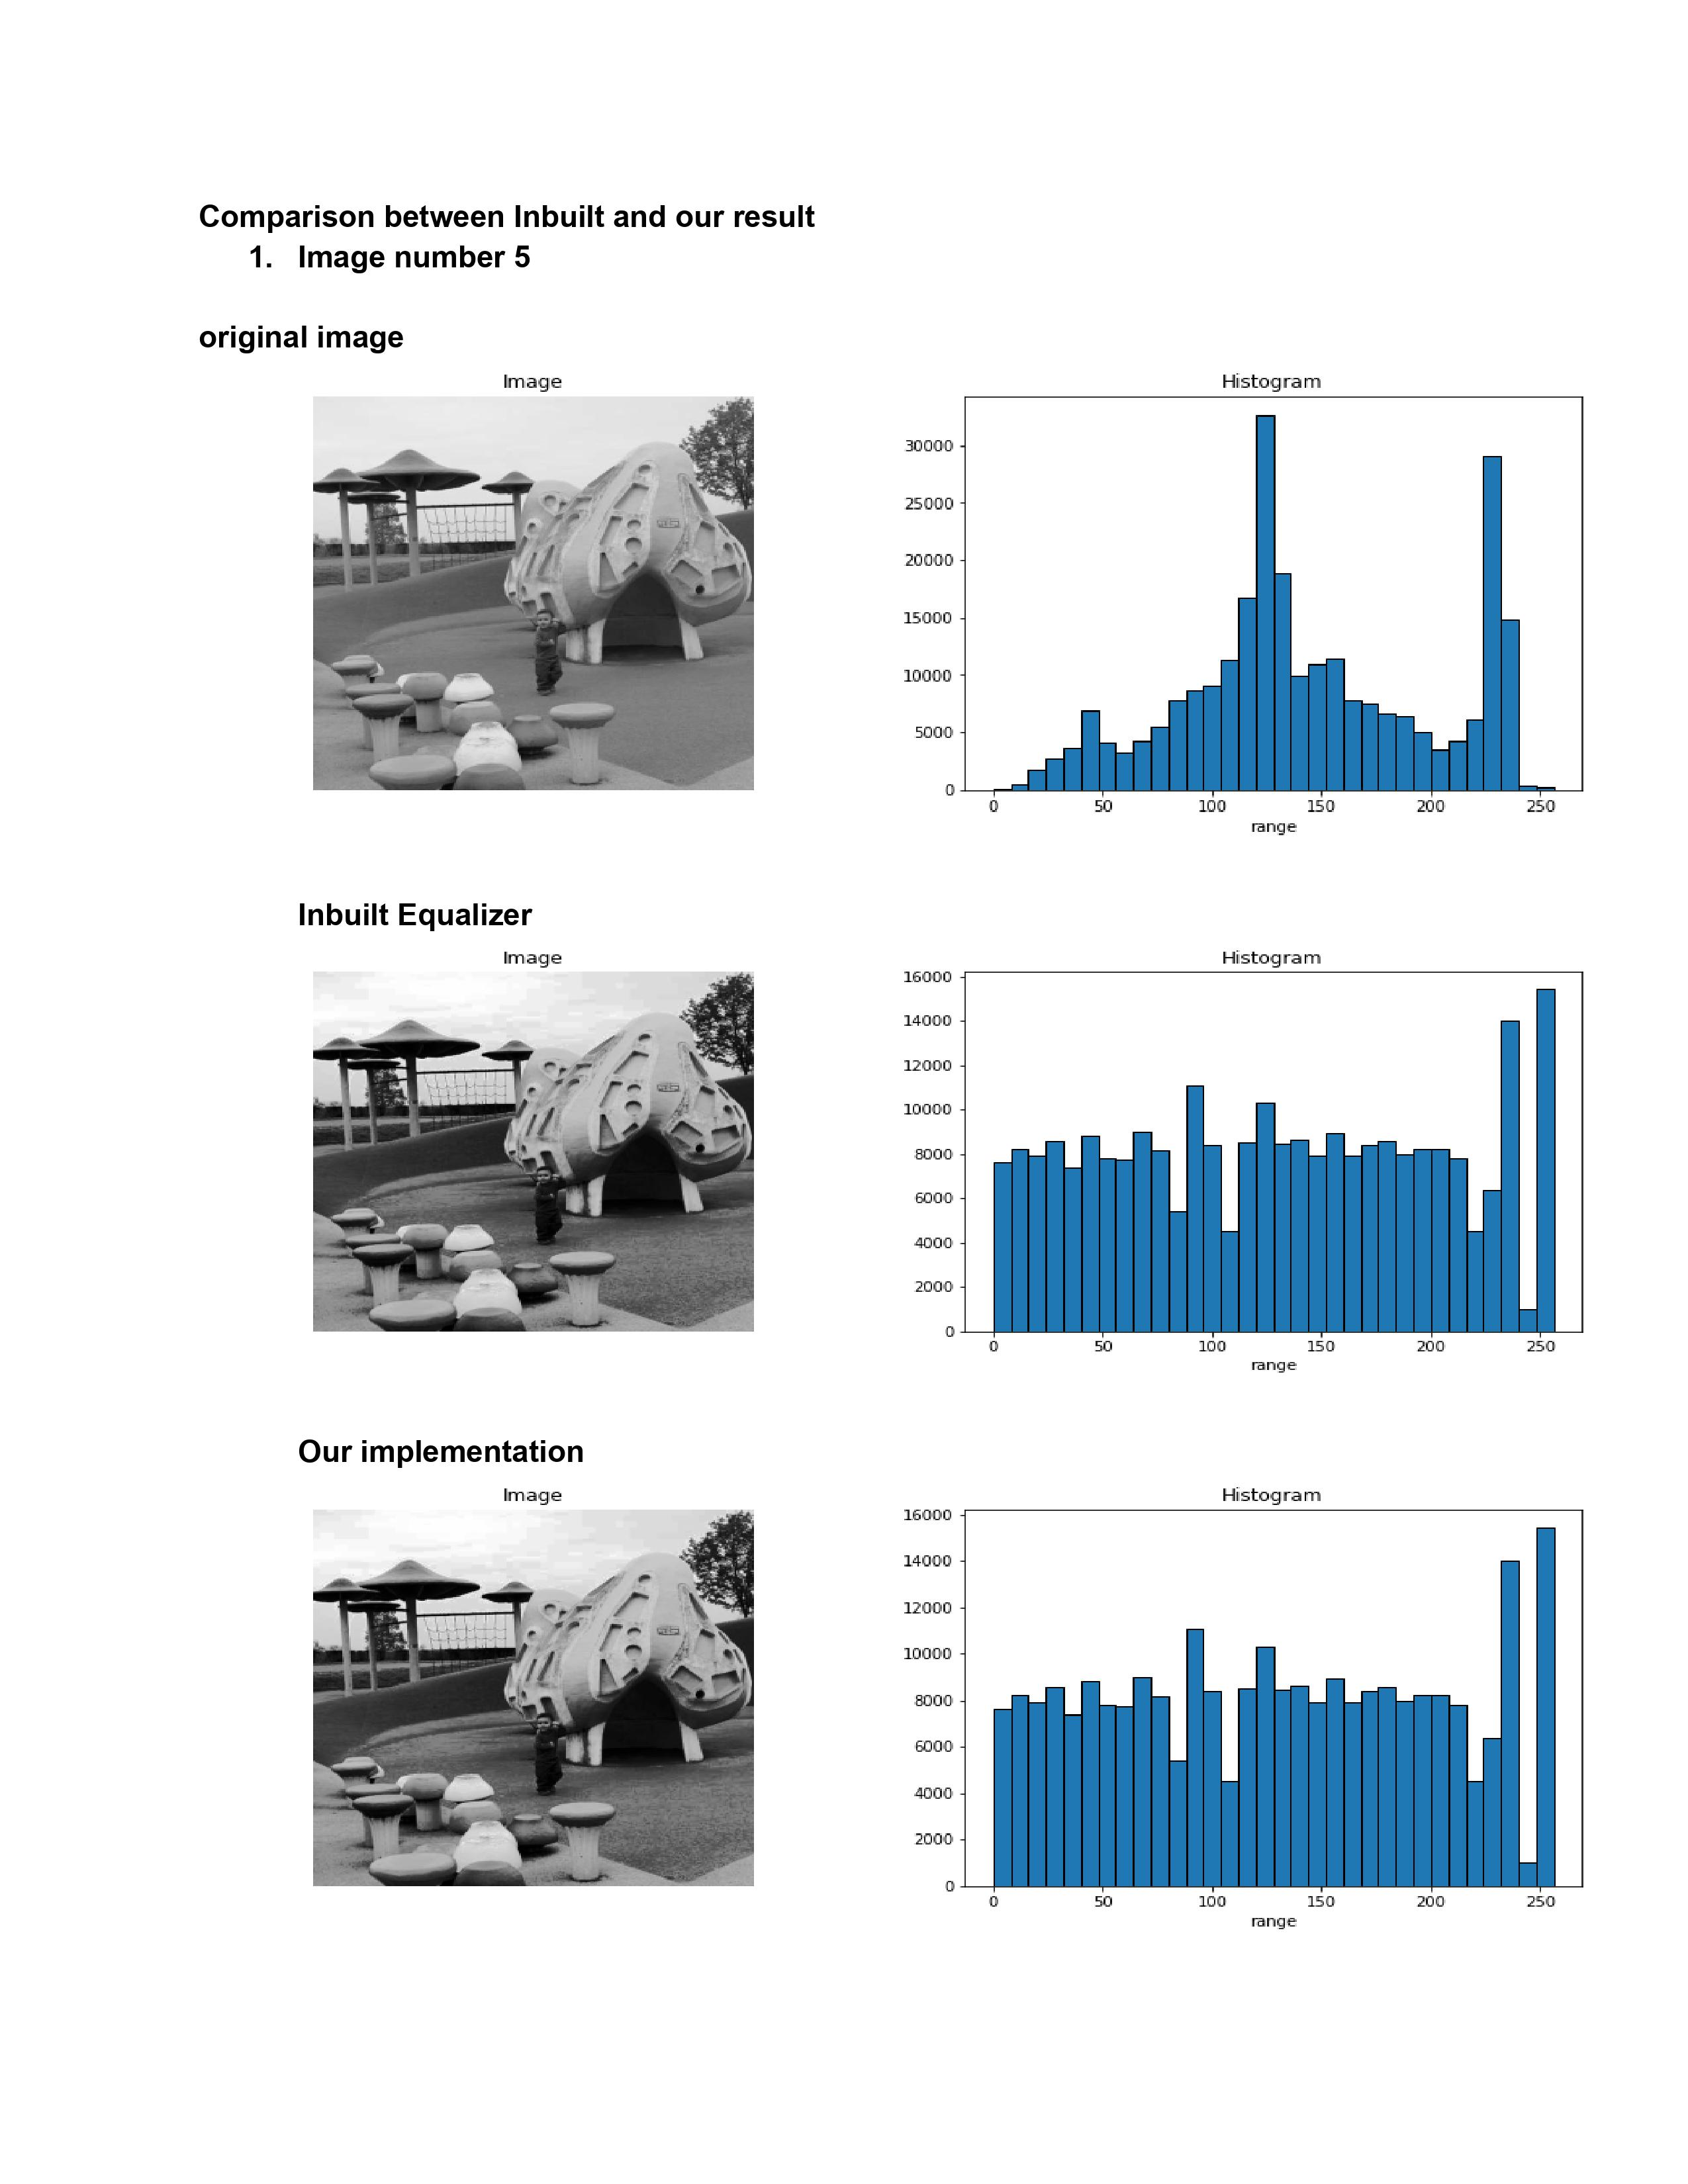

## Histogram Matching

### Question 5: What is Histogram Matching
[1]

Histogram matching is a process where a time series, image, or higher dimension scalar data is modified such that its histogram matches that of another (reference) dataset. A common application of this is to match the images from two sensors with slightly different responses, or from a sensor whose response changes over time. 

The algorithm is as follows. The cumulative histogram is computed for each dataset, see the diagram below. For any particular value (xi) in the data to be adjusted has a cumulative histogram value given by G(xi). This in turn is the cumulative distribution value in the reference dataset, namely H(xj). The input data value xi is replaced by xj.

### Question 6
below are some inbuilt examples of histogram matching from scikit image, your task is to reproduce them without using any inbuilts, you can use the function `compare_matched_hist` to show insights, also **explain your results comparing** with inbuilt.
[2+1]

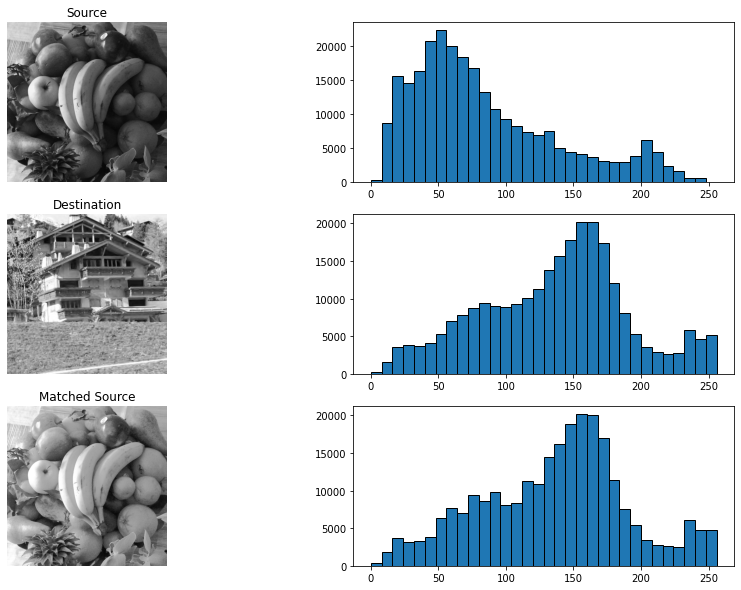

In [ ]:
from skimage import exposure

src = load_image(17)
dst = load_image(23)
matched_src = exposure.match_histograms(src,dst)

compare_matched_hist(src,dst,matched_src)

<ipython-input-85-938810ab444d>:2: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "my_matching_histograms" failed type inference due to: Invalid use of type(CPUDispatcher(<function cdf_ at 0x7f6eca850680>)) with parameters (array(uint8, 2d, C))

During: resolving callee type: type(CPUDispatcher(<function cdf_ at 0x7f6eca850680>))
During: typing of call at <ipython-input-85-938810ab444d> (11)


File "<ipython-input-85-938810ab444d>", line 11:
def my_matching_histograms(src,dst):
    <source elided>
  # [TODO] 
  src_eq= cdf_(src)
  ^

  @jit
<ipython-input-85-938810ab444d>:2: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "my_matching_histograms" failed type inference due to: cannot determine Numba type of <class 'numba.core.dispatcher.LiftedLoop'>

File "<ipython-input-85-938810ab444d>", line 14:
def my_matching_histograms(src,dst):
    <source elided>
  map=np.zeros(256)
  for 

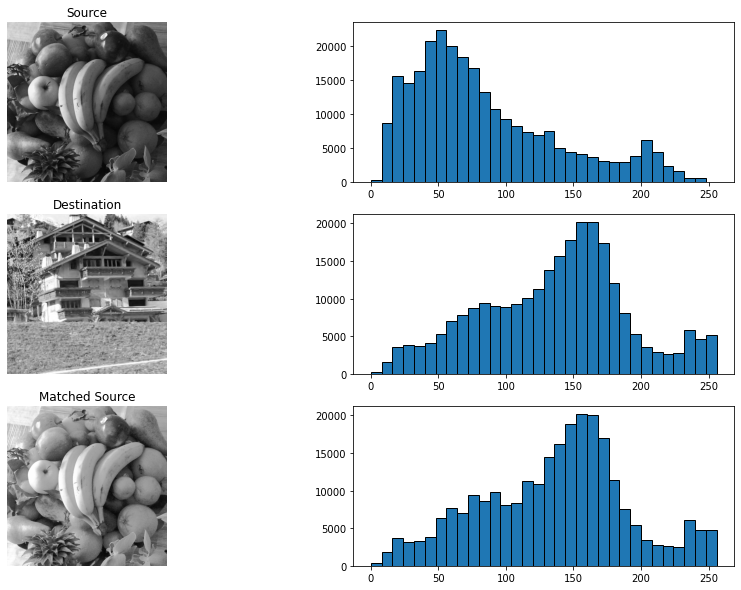

In [ ]:

@jit
def my_matching_histograms(src,dst):
  """
  :param src: input image
  :param dst: reference image
  :rtype: image 
  :return mathced_src: histogram matched src image
  """
  # [TODO] 
  src_eq= cdf_(src)
  dst_eq= cdf_(dst)
  map=np.zeros(256)
  for i in range(256):
    for j in range(256):
      if(dst_eq[j]>src_eq[i]):
        map[i]=j-1
        break
  matched_src= src.copy()
  r,c=src.shape
  temp=0
  for i in range(r):
    for j in range(c):
      temp=src[i][j]
      matched_src[i][j]=map[temp]
  return matched_src

compare_matched_hist(src,dst,my_matching_histograms(src,dst))

## **Our results matched with the inbuilt functions. this is so because we applies same logic as the logic used in built in function following image are proof of our testimony.**
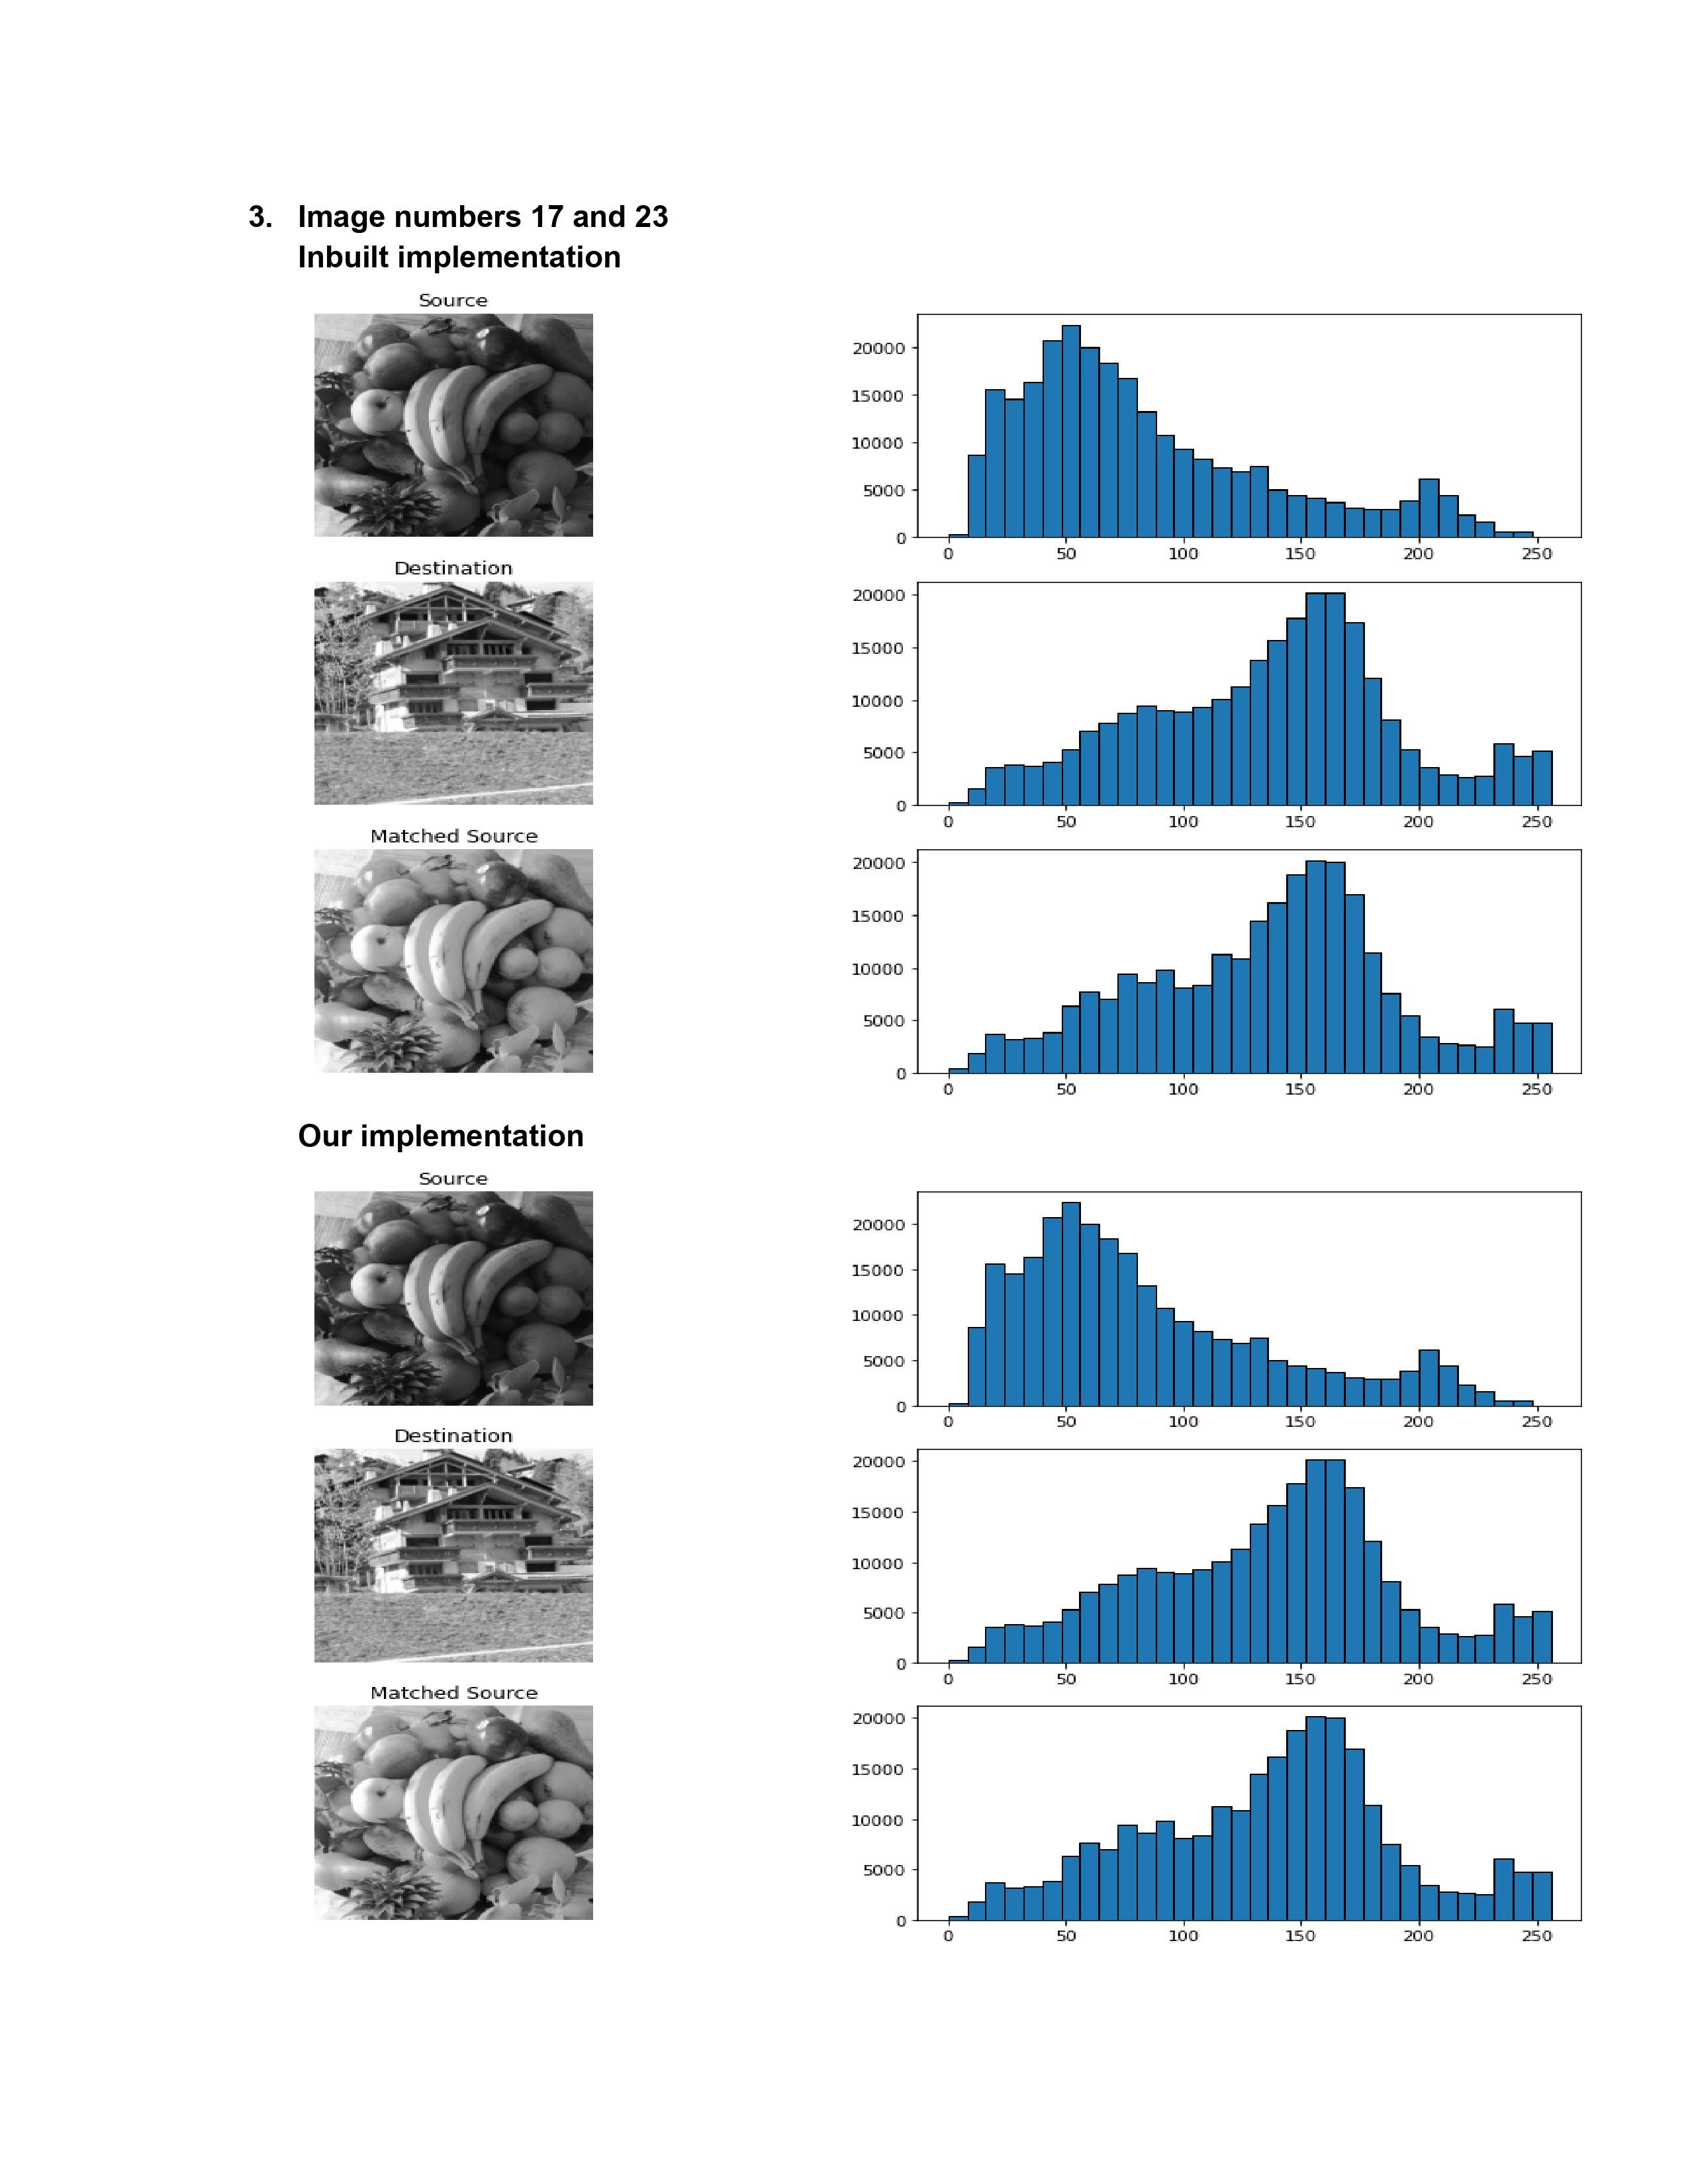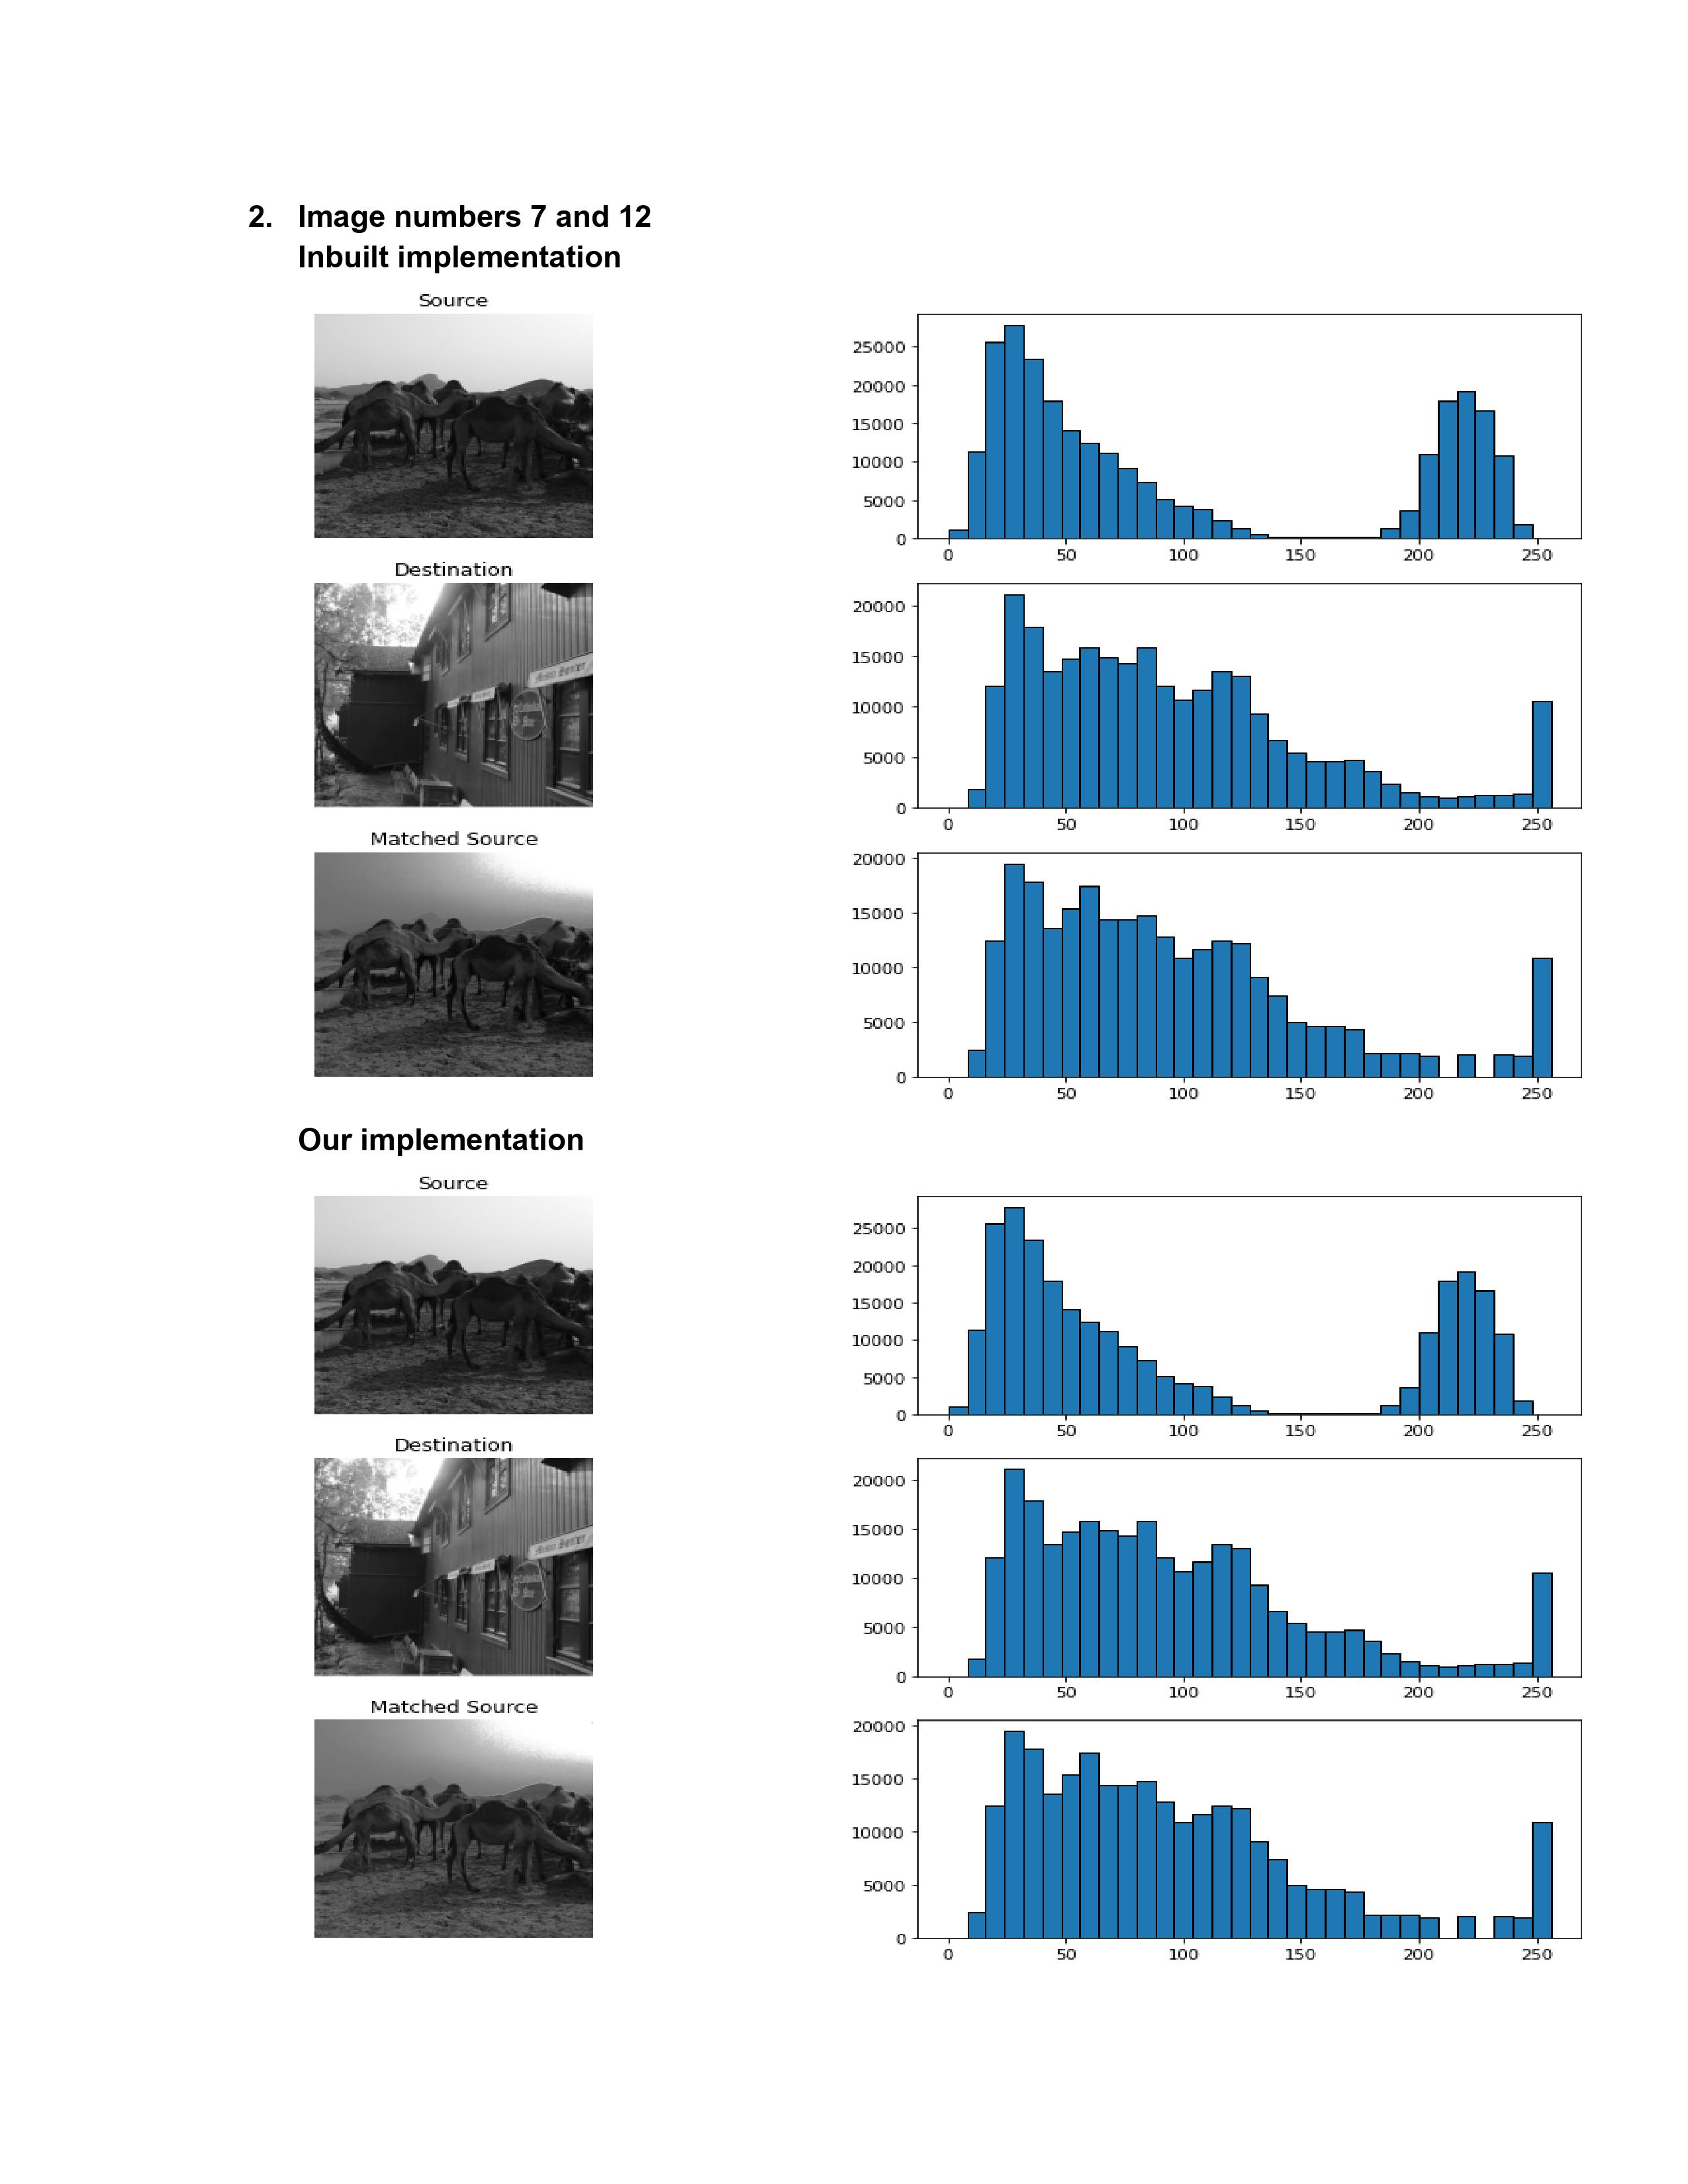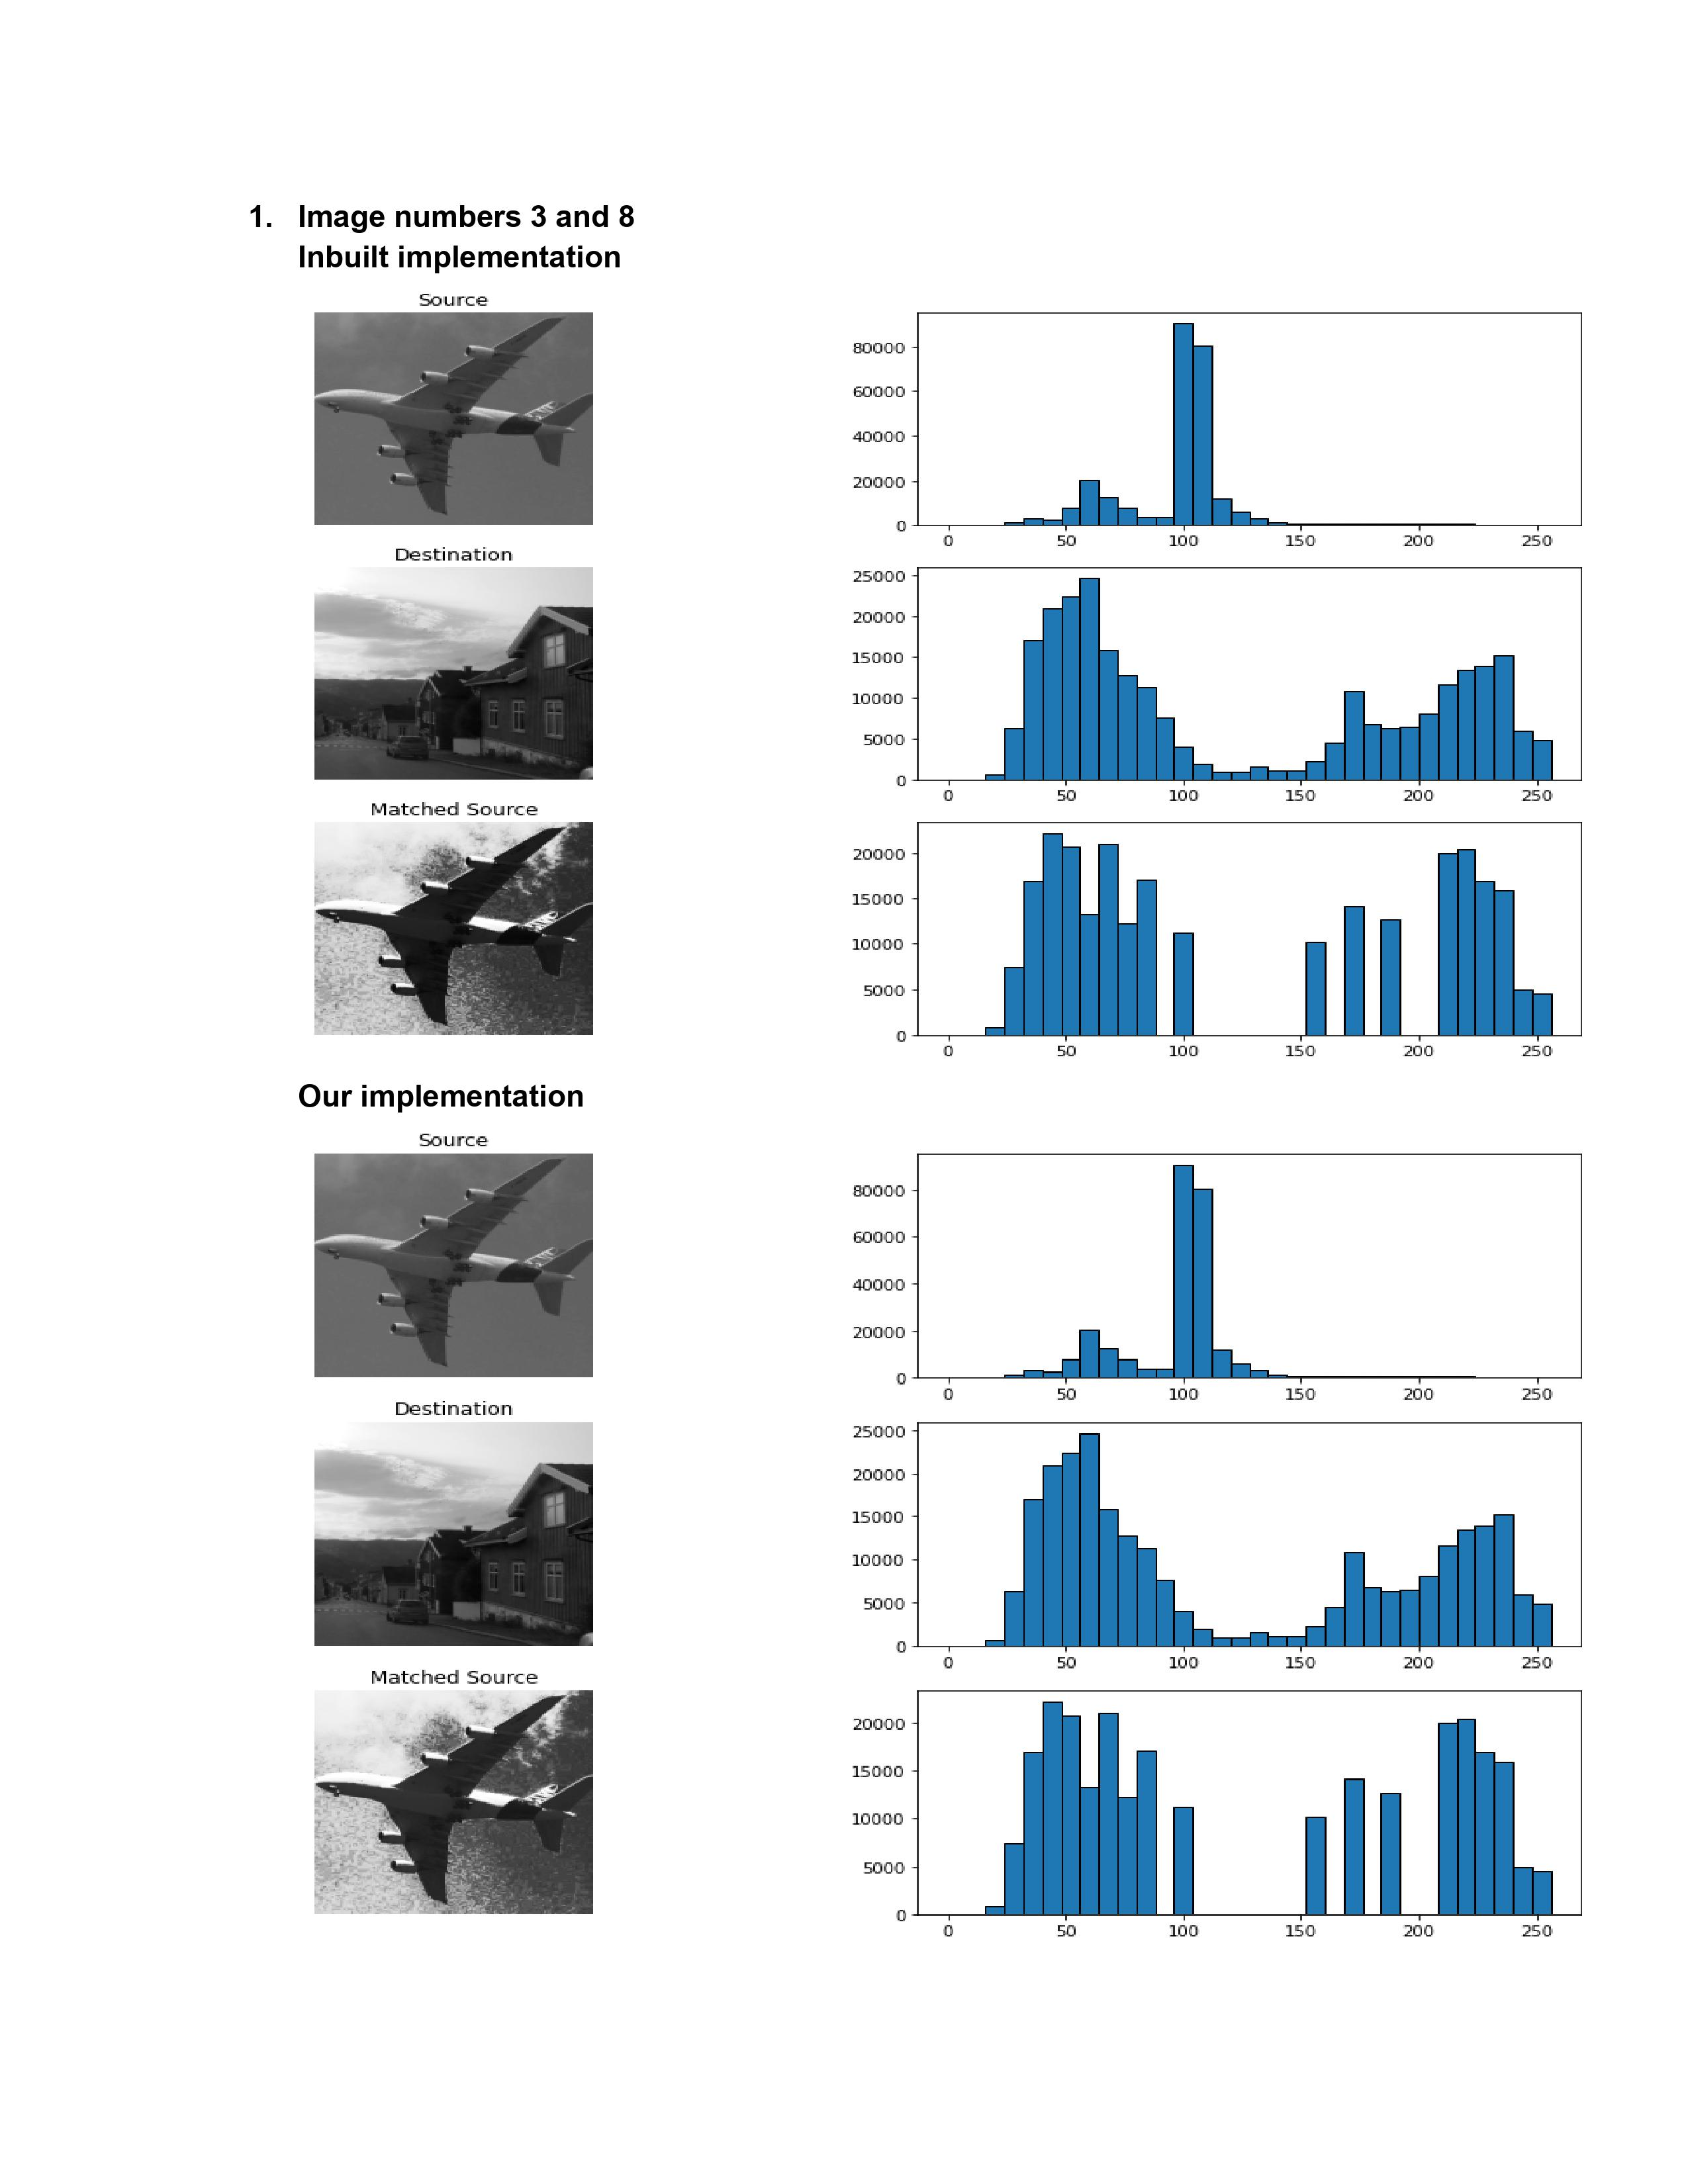 

### Question 7
Checking optimization
[1]

In [ ]:
src = load_image(3)
dst = load_image(2)

In [ ]:
%%timeit

my_equalizing_histograms(src)
my_matching_histograms(src,dst)

1000 loops, best of 5: 1.62 ms per loop
